* terminologies: modeling, fitting, regression, inference, optimization, parameter exploration

## frameworks
* Frequentist
 - numpy.linalg
 - statsmodels
 - scipy.stats
* Bayesian
 - [pymc3](https://github.com/pymc-devs/pymc3)
 - [bambi]() wrapper
 - [pyro](https://github.com/pyro-ppl/pyro) for variational inference
 - [dynesty](https://github.com/joshspeagle/dynesty) for nested sampling

## Data

In [4]:
import pandas as pd
import numpy as np
np.random.seed(123)

import matplotlib.pyplot as pl
pl.style.use('seaborn-darkgrid')

### 1D line with uncertainties

Code based on the [tutorial](https://emcee.readthedocs.io/en/v2.2.1/user/line/)

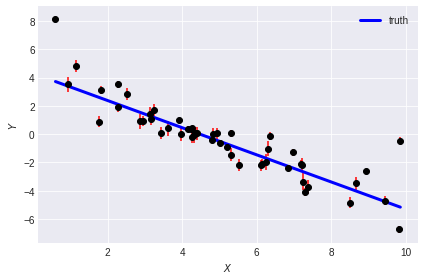

In [5]:
# truth
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# generate mock data
N = 50
x = np.sort(10 * np.random.rand(N))
yerr = 0.1 + 0.5 * np.random.rand(N)
y_true = m_true * x + b_true
y = y_true + np.abs(f_true * y_true) * np.random.randn(N)
y += yerr * np.random.randn(N)

# plot results
# pl.figure(figsize=(10, 5))
pl.errorbar(x, y, yerr=yerr, fmt='ko', ecolor='red')
pl.plot(x, y_true, color='blue', lw=3, label='truth')
pl.xlabel(r'$X$')
pl.ylabel(r'$Y$')
pl.legend()
pl.tight_layout()

### 2D
Code based on the [tutorial](https://docs.pymc.io/notebooks/getting_started).

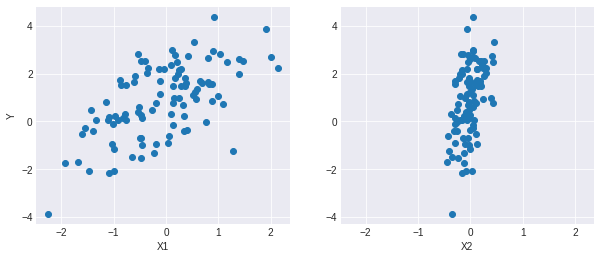

In [5]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

fig, axs = pl.subplots(1, 2, sharex=True, figsize=(10,4))
axs[0].scatter(X1, Y)
axs[1].scatter(X2, Y)
axs[0].set_ylabel('Y')
axs[0].set_xlabel('X1')
axs[1].set_xlabel('X2');

### t-test data

Code based on the [tutorial](https://bambinos.github.io/bambi/notebooks/Bayesian_Frequentist_Tutorial_statsmodels.html)

In [20]:
a = np.random.normal(5,2,1000)
b = np.random.normal(8,2.5,1000)
df = pd.DataFrame({'Group':['a']*1000 + ['b']*1000,'Val':np.hstack([a,b])})
df.groupby('Group').describe()

Val                                                              \
        count      mean       std       min       25%       50%       75%   
Group                                                                       
a      1000.0  4.997957  1.995642 -0.932009  3.609291  4.948911  6.355582   
b      1000.0  8.054886  2.450257  0.305960  6.383242  8.088293  9.690568   

                  
             max  
Group             
a      11.696307  
b      15.284853

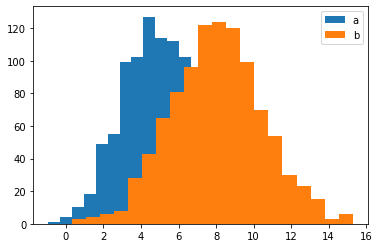

In [28]:
fig, ax = pl.subplots(figsize=(6,4))
for key, grp in df.groupby(['Group']):
    ax.hist(grp['Val'], label=key, bins=20)
pl.legend()

### N-dimensional Gaussian
Taken from [emcee](https://emcee.readthedocs.io/en/v2.2.1/user/quickstart/#how-to-sample-a-multi-dimensional-gaussian)

In [54]:
import numpy as np

def lnprob(x, mu, icov):
    diff = x-mu
    return -np.dot(diff,np.dot(icov,diff))/2.0

ndim = 50 #number of parameters/dimensions

means = np.random.rand(ndim)

cov = 0.5 - np.random.rand(ndim ** 2).reshape((ndim, ndim))
cov = np.triu(cov)
cov += cov.T - np.diag(cov.diagonal())
cov = np.dot(cov,cov)

## scipy.stats

In [44]:
import scipy
scipy.__version__

'1.3.3'

In [42]:
from scipy.stats import ttest_ind

ttest_ind(b,a)

Ttest_indResult(statistic=30.590179466792385, pvalue=6.872613004335864e-169)

## statsmodels

In [45]:
import statsmodels
statsmodels.__version__

'0.11.1'

In [19]:
import statsmodels.formula.api as smf

In [29]:
result = smf.ols('Val ~ C(Group)', df).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    Val   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     935.8
Date:                Thu, 02 Apr 2020   Prob (F-statistic):          6.87e-169
Time:                        11:32:42   Log-Likelihood:                -4444.9
No. Observations:                2000   AIC:                             8894.
Df Residuals:                    1998   BIC:                             8905.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.9980      0.071     70.730

## fbprophet
* https://facebook.github.io/prophet/docs/quick_start.html

## pm-prophet
* https://github.com/luke14free/pm-prophet#installing-pm-prophet

## sklearn

In [1]:
import sklearn
sklearn.__version__

'0.21.3'

## bambi
Code based on the [tutorial](https://bambinos.github.io/bambi/notebooks/Bayesian_Frequentist_Tutorial_statsmodels.html)

In [46]:
import bambi
bambi.__version__

'0.2.0'

In [37]:
import bambi as bb
import arviz as az

In [33]:
b_model = bb.Model(df)
res_b = b_model.fit('Val ~ Group', samples=1000)

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Val_sd, Group, Intercept]
INFO:pymc3:NUTS: [Val_sd, Group, Intercept]
Sampling 4 chains, 0 divergences: 100%|██████████| 6000/6000 [00:02<00:00, 2636.95draws/s]
The acceptance probability does not match the target. It is 0.8839996165734362, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8806599190765152, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.889050537057125, but should be close to 0.8. Try to increase the number of tuning steps.


In [34]:
# Here's the setup for the model
b_model.backend.model

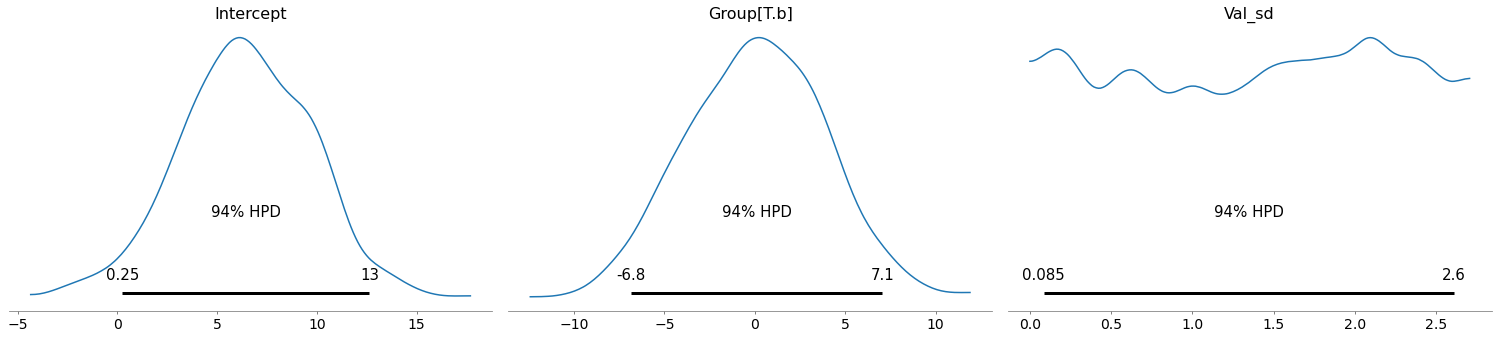

In [35]:
# Model priors
b_model.plot();

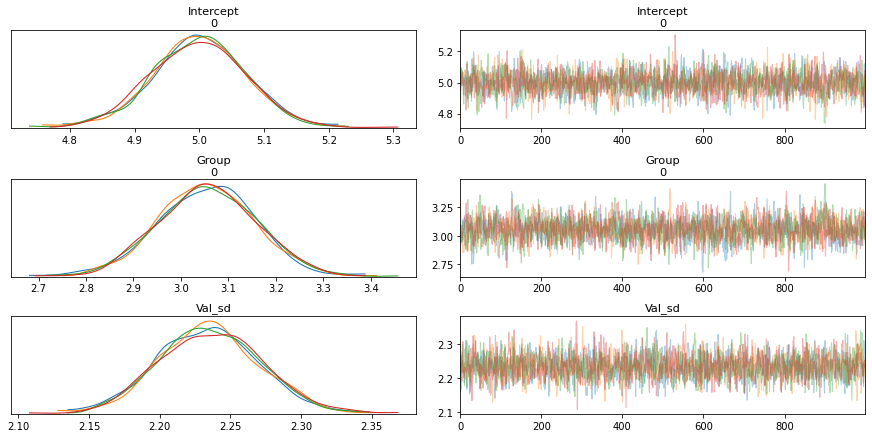

In [38]:
az.plot_trace(res_b);

In [39]:
az.summary(res_b)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
Intercept[0],5.000,0.072,4.867,5.140,0.002,0.001,2089.0,2089.0,2101.0,2180.0,1.0
Group[0],3.055,0.102,2.871,3.248,0.002,0.002,1999.0,1988.0,2007.0,2365.0,1.0
Val_sd,2.235,0.036,2.169,2.301,0.001,0.000,2584.0,2573.0,2607.0,2421.0,1.0


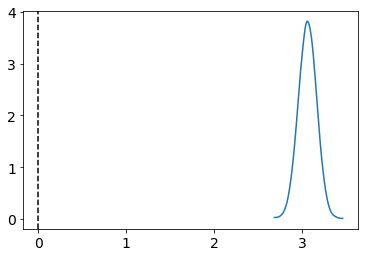

In [40]:
# Grab just the posterior of the term of interest (group)
group_posterior = res_b.posterior['Group'].values
ax = az.plot_kde(group_posterior)
ax.axvline(0, 0, 3, linestyle='--', color='k');

In [41]:
#Probabiliy that posterior is > 1
(group_posterior > 1).mean()

1.0

## emcee
Code based on the [tutorial](https://emcee.readthedocs.io/en/v2.2.1/user/quickstart/#how-to-sample-a-multi-dimensional-gaussian)

In [51]:
import emcee
emcee.__version__

'3.0.2'

In [55]:
nwalkers = 250
p0 = np.random.rand(ndim * nwalkers).reshape((nwalkers, ndim))

icov = np.linalg.inv(cov)
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[means, icov])

In [59]:
#logprob
lnprob(p0[1], means, icov)

-25.723924994864976

In [60]:
#burn-in stage
pos, prob, state = sampler.run_mcmc(p0, 100)
sampler.reset()

In [62]:
#production run
pos, prob, state = sampler.run_mcmc(pos, 1000)

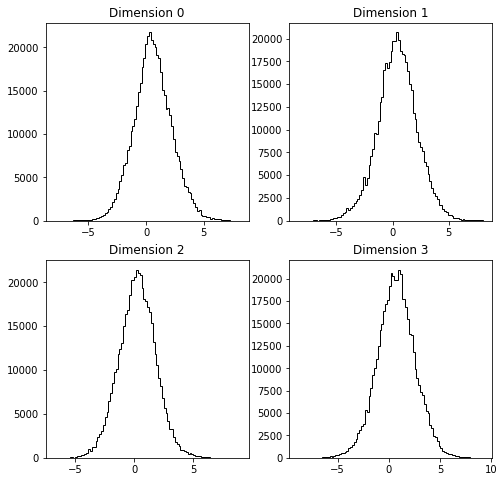

In [68]:
fig, axs = pl.subplots(2,2, figsize=(8,8))
ax = axs.flatten()

nparams = 4 #first 4 dimensions
for i in range(ndim)[:nparams]:
    ax[i].hist(sampler.flatchain[:,i], 100, color="k", histtype="step")
    ax[i].set_title("Dimension {0:d}".format(i))

In [65]:
#acceptable values 0.25 to 0.50
print("Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.acceptance_fraction)))

Mean acceptance fraction: 0.191


In [69]:
sampler.flatchain.shape

(500000, 50)

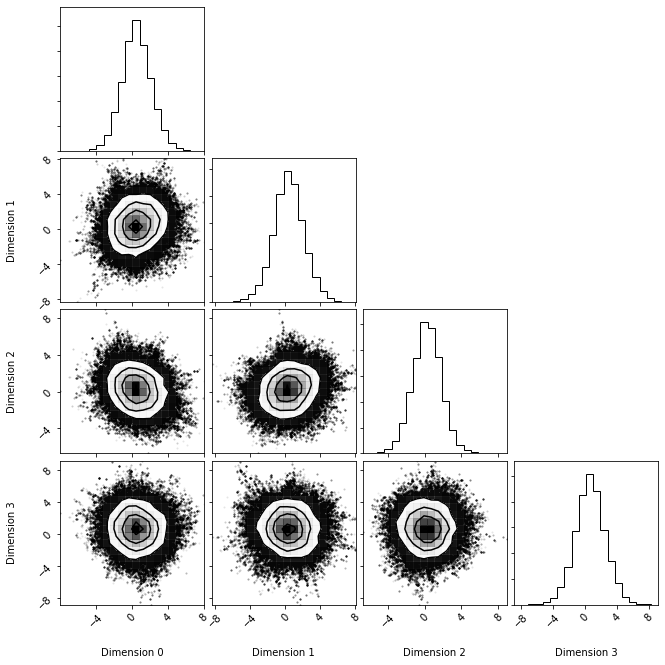

In [73]:
from corner import corner

nparams = 4
labels = ["Dimension {0:d}".format(i) for i in range(nparams)]
fig = corner(sampler.flatchain[:,:nparams], labels=labels);

## dynesty

Code based on the [tutorial](https://github.com/joshspeagle/dynesty/blob/master/demos/Examples%20--%20Linear%20Regression.ipynb)

In [8]:
import dynesty
dynesty.__version__

'0.9.7'

In [6]:
# log-likelihood
def loglike(theta):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0 / (yerr**2 + model**2 * np.exp(2 * lnf))
    
    return -0.5 * (np.sum((y-model)**2 * inv_sigma2 - np.log(inv_sigma2)))

# prior transform
def prior_transform(utheta):
    um, ub, ulf = utheta
    m = 5.5 * um - 5.
    b = 10. * ub
    lnf = 11. * ulf - 10.
    
    return m, b, lnf

In [9]:
dsampler = dynesty.DynamicNestedSampler(loglike, prior_transform, ndim=3,
                                        bound='multi', sample='rstagger')
dsampler.run_nested()

iter: 22070 | batch: 9 | bound: 218 | nc: 25 | ncall: 513175 | eff(%):  4.301 | loglstar: -51.861 < -44.875 < -45.417 | logz: -55.194 +/-  0.179 | stop:  0.949                                       


In [15]:
dres = dsampler.results

(22070, 3)

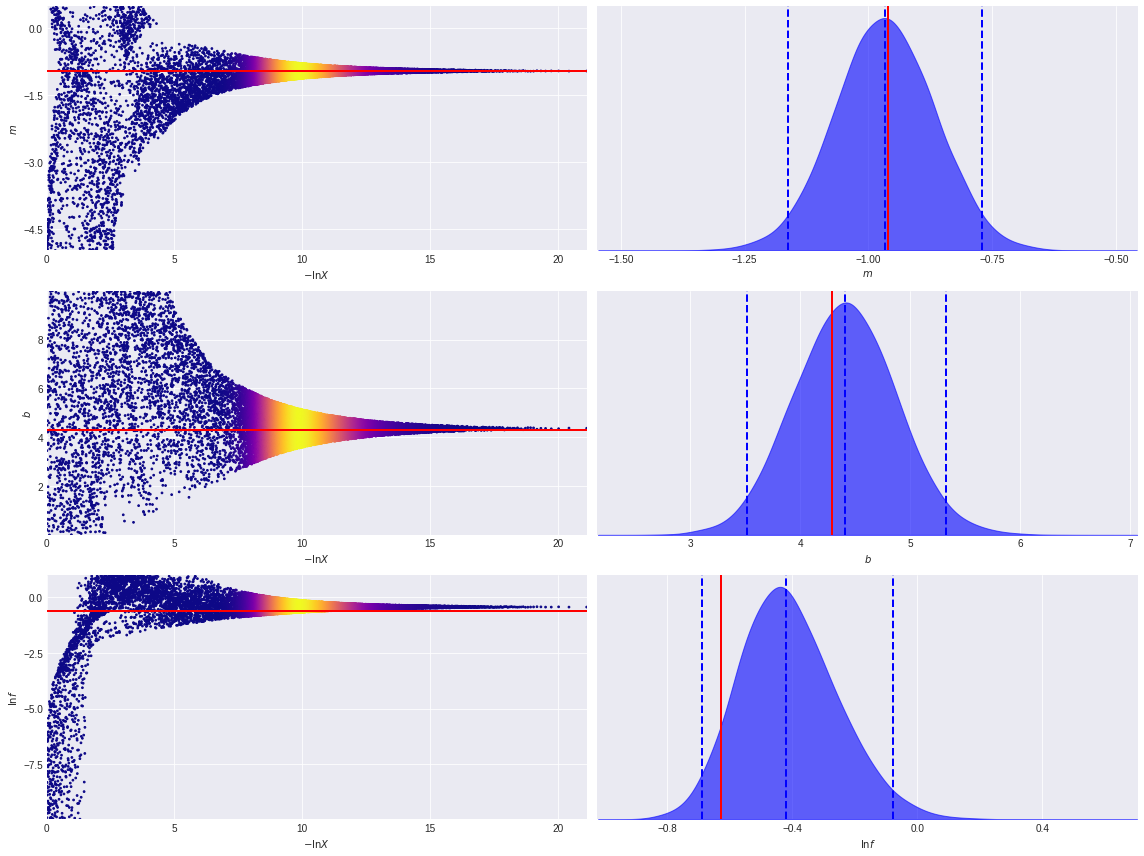

In [11]:
from dynesty import plotting as dyplot

truths = [m_true, b_true, np.log(f_true)]
labels = [r'$m$', r'$b$', r'$\ln f$']
fig, axes = dyplot.traceplot(dres, truths=truths, labels=labels,
                             fig=pl.subplots(3, 2, figsize=(16, 12)))
fig.tight_layout()

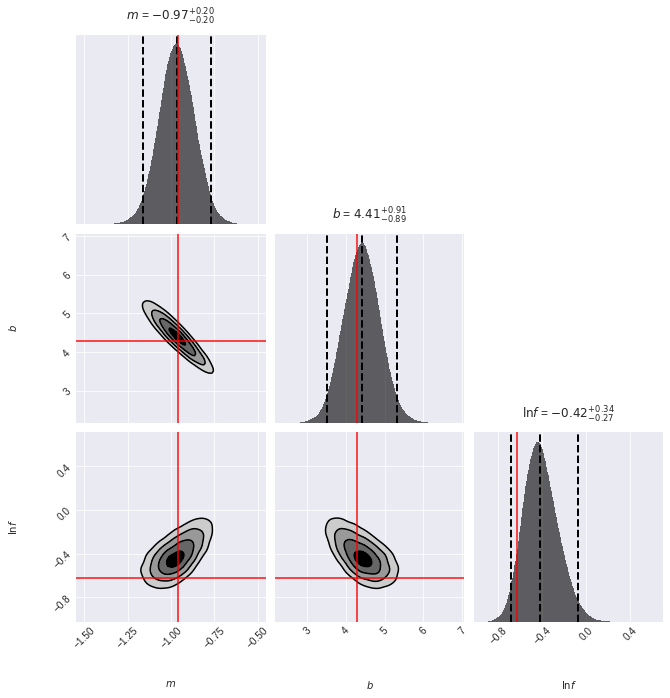

In [20]:
fig, axes = dyplot.cornerplot(dres, truths=truths, show_titles=True, 
                              title_kwargs={'y': 1.04}, labels=labels,
                              fig=pl.subplots(3, 3, figsize=(10, 10)))

In [17]:
dres.samples.shape

(22070, 3)

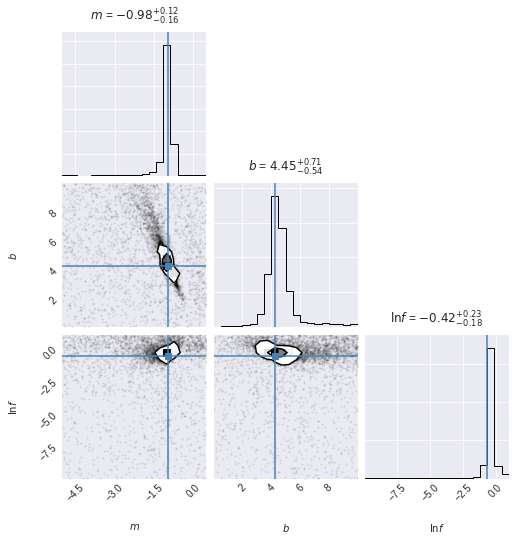

In [16]:
from corner import corner

fig = corner(dres.samples, truths=truths, show_titles=True, 
        title_kwargs={'y': 1.04}, labels=labels);

## pymc3
Code based on the [tutorial](https://docs.pymc.io/notebooks/getting_started).

In [47]:
import pymc3
pymc3.__version__

'3.8'

In [2]:
import pymc3 as pm
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.8


In [3]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal('alpha', mu=0, sigma=10)
    beta = pm.Normal('beta', mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0]*X1 + beta[1]*X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y)
    
map_estimate = pm.find_MAP(model=basic_model, method='bfgs')
map_estimate

logp = -149.58, ||grad|| = 12.242: 100%|██████████| 19/19 [00:00<00:00, 1662.29it/s]  


{'alpha': array(0.90660093),
 'beta': array([0.94848596, 2.60711845]),
 'sigma_log__': array(-0.03771373),
 'sigma': array(0.96298858)}

In [4]:
#sampling
with basic_model:
    
    # instantiate sampler
#     step = pm.Slice() #default is NUTS
    
    # draw 500 posterior samples
    trace = pm.sample(500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta, alpha]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:01<00:00, 3602.64draws/s]


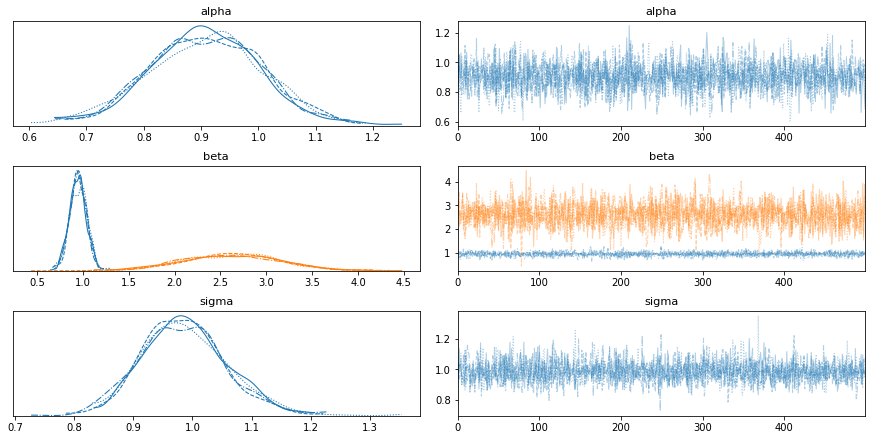

In [5]:
pm.traceplot(trace);

In [7]:
pm.summary(trace).round(2)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,0.91,0.10,0.72,1.08,0.00,0.00,2896.0,2873.0,2887.0,1404.0,1.00
beta[0],0.95,0.09,0.78,1.12,0.00,0.00,3060.0,3060.0,3072.0,1807.0,1.01
beta[1],2.61,0.52,1.68,3.58,0.01,0.01,2749.0,2671.0,2766.0,1635.0,1.00
sigma,0.99,0.07,0.85,1.12,0.00,0.00,2953.0,2902.0,2966.0,1739.0,1.00


## pyro
Code based on the [tutorial](https://pyro.ai/examples/intro_part_i.html)

In [ ]:
import torch
import pyro

torch__version__, pyro.__version__

In [ ]:
pyro.set_rng_seed(101)

loc = 0.   # mean zero
scale = 1. # unit variance
normal = torch.distributions.Normal(loc, scale) # create a normal distribution object
x = normal.rsample() # draw a sample from N(0,1)
print("sample", x)
print("log prob", normal.log_prob(x)) # score the sample from N(0,1)

In [ ]:
def weather():
    cloudy = torch.distributions.Bernoulli(0.3).sample()
    cloudy = 'cloudy' if cloudy.item() == 1.0 else 'sunny'
    mean_temp = {'cloudy': 55.0, 'sunny': 75.0}[cloudy]
    scale_temp = {'cloudy': 10.0, 'sunny': 15.0}[cloudy]
    temp = torch.distributions.Normal(mean_temp, scale_temp).rsample()
    return cloudy, temp.item()

## pyDiamonds

In [ ]:
import pydiamonds
pydiamonds.__version__